In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
import tensorflow as tf
from tensorflow.keras import Model

In [3]:
(x_train, _),(x_test, _) = fashion_mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [6]:
class Autoencoder(Model):
    def __init__(self, dimension):
        super().__init__()
        self.dim = dimension # hidden layer neurons
        self.encoder = tf.keras.Sequential([
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(dimension, activation="relu")
        ])
        
        self.decoder = tf.keras.Sequential([
            tf.keras.layers.Dense(784, activation="sigmoid"),
            tf.keras.layers.Reshape((28,28))
        ])
        
    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded
    

In [27]:
autoencoder = Autoencoder(64)

In [28]:
autoencoder.compile(optimizer="adam", loss=tf.keras.losses.MeanSquaredError())
autoencoder.fit(x_train, x_train, epochs=10, validation_data=(x_test, x_test))

Epoch 1/10
1875/1875 [==============================] - 1s 603us/step - loss: 0.0239 - val_loss: 0.0135
Epoch 2/10
1875/1875 [==============================] - 1s 599us/step - loss: 0.0117 - val_loss: 0.0107
Epoch 3/10
1875/1875 [==============================] - 1s 578us/step - loss: 0.0101 - val_loss: 0.0098
Epoch 4/10
1875/1875 [==============================] - 1s 580us/step - loss: 0.0094 - val_loss: 0.0093
Epoch 5/10
1875/1875 [==============================] - 1s 582us/step - loss: 0.0091 - val_loss: 0.0091
Epoch 6/10
1875/1875 [==============================] - 1s 580us/step - loss: 0.0090 - val_loss: 0.0090
Epoch 7/10
1875/1875 [==============================] - 1s 588us/step - loss: 0.0089 - val_loss: 0.0089
Epoch 8/10
1875/1875 [==============================] - 1s 586us/step - loss: 0.0088 - val_loss: 0.0089
Epoch 9/10
1875/1875 [==============================] - 1s 590us/step - loss: 0.0088 - val_loss: 0.0088
Epoch 10/10
1875/1875 [==============================] - 1s 590u

In [29]:
encoded_imgs = autoencoder.encoder(x_test).numpy()

In [30]:
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

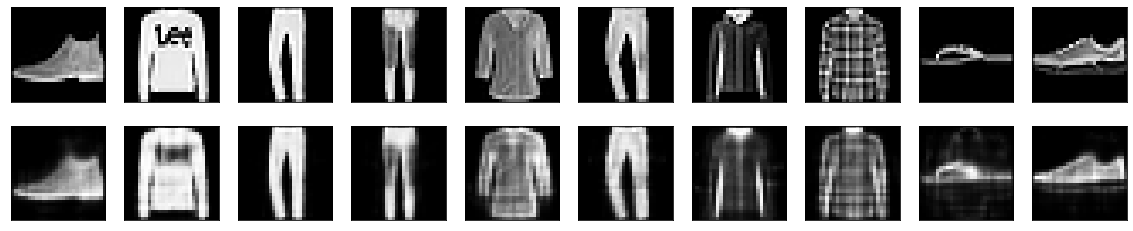

In [31]:
n = 10
plt.figure(figsize=(20,4))

for i in range(n):
    ax = plt.subplot(2, n,i+1)
    plt.imshow(x_test[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(2, n,n+i+1)
    plt.imshow(decoded_imgs[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)